<img src="./resources/logo_UTN.svg" align="right" width="300" /> 


# Trabajo Práctico 1 - Grupo 5

## Amplificadores OPAMP y OTA

### Integrantes:
- Hernan Rodriguez
- Martin Rivas
- Juan Costa
- Matias Pardo Errecarret

#### Ejercicio 1:
<img src="./resources/eje1_consigna.png" align="center" width="600" /> 

In [32]:
########################################### Eje 1 Resolucion Analitica ###########################################
from IPython.display import IFrame
IFrame("./resources/tp1_ej1.pdf", width=950, height=1000)

#### Ejercicio 2:
<img src="./resources/eje2_consigna.png" align="center" width="600" /> 

In [5]:
########################################### Eje 2 Resolucion Analitica ##########################################
IFrame("./resources/tp1_ej2.pdf", width=950, height=1000)

In [37]:
import sympy as sp
from sympy.abc import s #importamos simbolo s
from IPython.display import display, Math, Markdown

sol = "Vab = "

#Declaro simbolos variables
V1, Va, Vb = sp.symbols("V1, Va, Vb")
G, Ga, Gb, k = sp.symbols("G, Ga, Gb, k")

aa = sp.solve([ V1*(Ga+2*G)-Va*Ga, 
                -Vb*Gb-V1*G], 
                [Va, Vb])

transf_func = aa[Va]-aa[Vb]

# Ejercicio TP1_Eje_2:

tf7a = transf_func.subs(Ga, 2*G/(k-1))
tf7a = tf7a.subs(Gb, G/(k))

tf7a = sp.simplify(tf7a)
print('#################################')
print('# Simulacion Simbolica TP1_Eje2 #')
print('#################################')

display(
    Markdown(
        'Vab = {}'.format(
            sp.latex(tf7a, mode='inline')
        )
    )
)



#################################
# Simulacion Simbolica TP1_Eje2 #
#################################


Vab = $2 V_{1} k$

#### Ejercicio 3:
<img src="./resources/eje3_consigna.png" align="center" width="600" /> 

In [33]:
########################################### Eje 3 Resolucion Analitica ##########################################
IFrame("./resources/tp1_ej3.pdf", width=950, height=1000)

#### Ejercicio 4:
<img src="./resources/eje4_consigna.png" align="center" width="600" /> 

In [35]:
########################################### Eje 4 Resolucion Analitica + LtSpice  #################################
IFrame("./resources/tp1_ej4.pdf", width=950, height=1000)

#### Ejercicio 5:
<img src="./resources/eje5_consigna.png" align="center" width="600" /> 

In [39]:
########################################### Eje 5 Resolucion Analitica + LtSpice  #################################
IFrame("./resources/tp1_ej5.pdf", width=950, height=1000)

#### Ejercicio 6:
<img src="./resources/eje6_consigna.png" align="center" width="600" /> 

In [40]:
########################################### Eje 6 Resolucion Analitica  ##########################################
IFrame("./resources/tp1_ej6.pdf", width=950, height=1000)

#### Ejercicio 7:
<img src="./resources/eje7_consigna.png" align="center" width="600" /> 

#### Ejercicio 7A:
El 7a fue parte de una entrega semanal:
[Ejercicio 7a](https://nbviewer.org/github/MatiPardoE/tc2/blob/master/es1/ES1%20Pardo.ipynb?flush_cache=true "ES1 Matias Pardo E")

In [42]:
########################################### Eje 7b Resolucion Analitica + LTSpice  ################################
IFrame("./resources/tp1_ej7b.pdf", width=950, height=1000)

In [52]:
#Eje 7b Pasatodo 2do Orden
#Declaro simbolos variables
V1, V2, Vx = sp.symbols("V1, V2, Vx")
Ga, Gb, Y1, Y2, G, C = sp.symbols("Ga, Gb, Y1, Y2, G, C")

#Condiciones

#La ecuacion de nodos es la misma que el 7a
#despues hago sub para las asociaciones series y //
aa = sp.solve([ Vx*(Y1+Y2)-V1*Y1, 
                Vx*(Ga+Gb) -V1*Ga -V2*Gb], 
                [V1, V2])

transf_func = aa[V2]/aa[V1]


# Ejercicio 7.b: Pasatodo de 2do orden

tf = transf_func.subs(Y1, (s*C*G)/(s*C+G))
tf = tf.subs(Y2, s*C+G)

num, den = sp.fraction(sp.simplify(sp.expand(tf)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

#Obtengo coeficiente de mayor grado del Num y Den LC()
#Lo divido para obtener el coeficiente externo
k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

tf_final = sp.Mul(k,num/den, evaluate=True)


print('#########################')
print('# Ejercicio 7b Generica #')
print('#########################')
display(tf_final)

#Para caso de Ra/Rb = 5
tf_case1 = tf.subs(Gb, Ga*5)

num, den = sp.fraction(sp.simplify(sp.expand(tf_case1)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

tf_final = sp.Mul(k,num/den, evaluate=True)

print('###############################')
print('# Ejercicio 7b Caso Ra/Rb = 5 #')
print('###############################')
display(tf_final)

#########################
# Ejercicio 7b Generica #
#########################


-Ga*(s**2 + s*(2*G*Ga - G*Gb)/(C*Ga) + G**2/C**2)/(Gb*(s**2 + 3*G*s/C + G**2/C**2))

###############################
# Ejercicio 7b Caso Ra/Rb = 5 #
###############################


-(s**2 - 3*G*s/C + G**2/C**2)/(5*(s**2 + 3*G*s/C + G**2/C**2))

In [55]:
#Caso Ra/Rb Normalizado
tf_case1_norm = tf_case1.subs(C, 1)
tf_case1_norm = tf_case1_norm.subs(G, 1)

num, den = sp.fraction(sp.simplify(sp.expand(tf_case1_norm)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

#Obtengo coeficiente de mayor grado del Num y Den LC()
#Lo divido para obtener el coeficiente externo
k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

tf_final = sp.Mul(k,num/den, evaluate=True)

print('')
print('###################################')
print('# Ejercicio 7b Caso 1 Normalizado #')
print('###################################')
display(tf_final)


###################################
# Ejercicio 7b Caso 1 Normalizado #
###################################


-(s**2 - 3*s + 1)/(5*(s**2 + 3*s + 1))

<IPython.core.display.Math object>

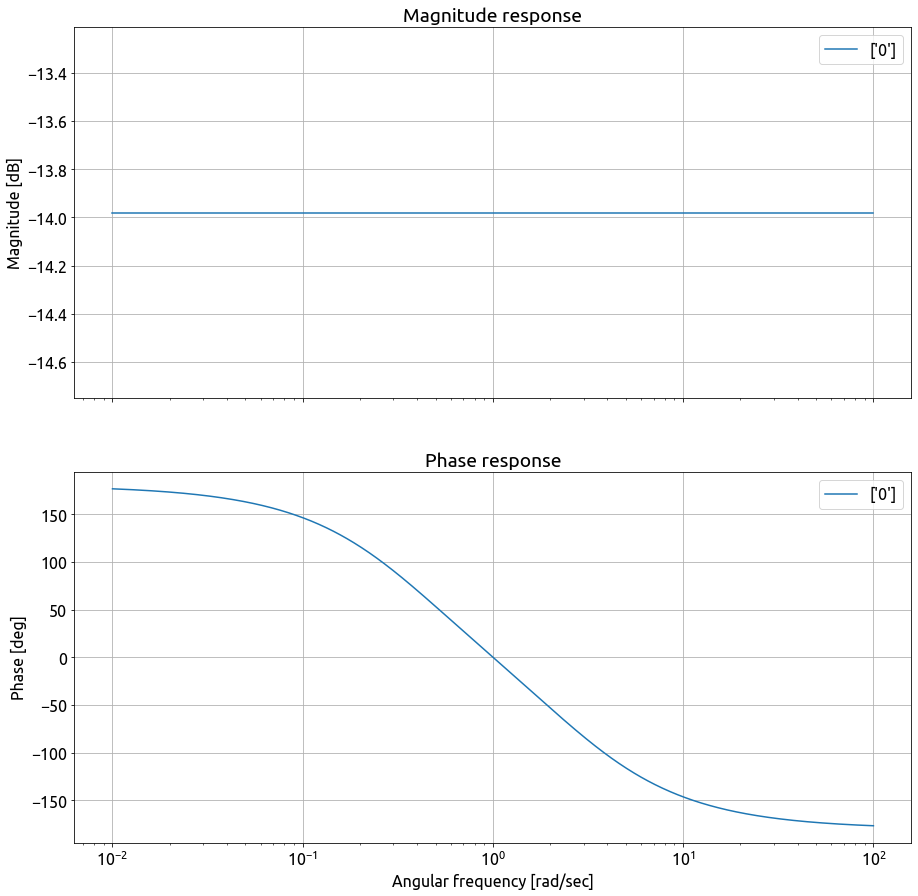

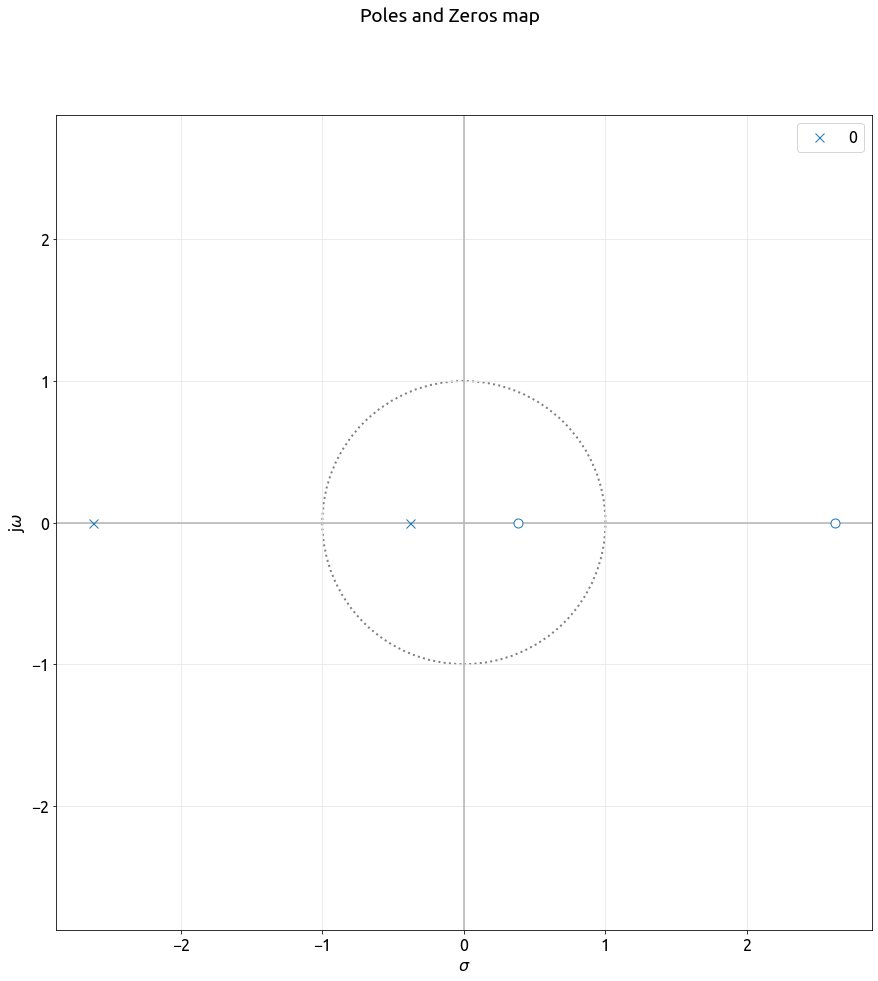

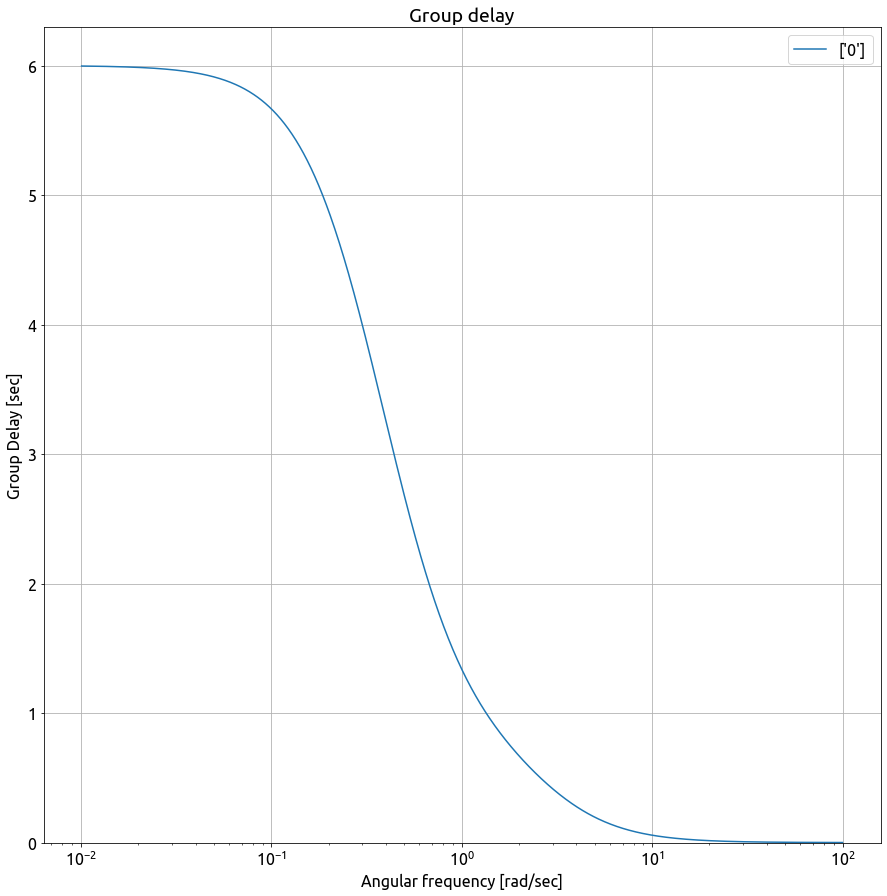

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from splane import analyze_sys, pretty_print_lti

#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (15,15)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

all_sos = []

wo = 1
    
num = np.array([1,-3,wo]) 
den = np.array([1,3, wo])*(-5) #Constante K 
    
mi_sos = sig.TransferFunction(num,den)
    
pretty_print_lti(mi_sos)
    
all_sos += [mi_sos]
    
analyze_sys(all_sos)

#### Ejercicio 8:
<img src="./resources/eje8_consigna.png" align="center" width="600" /> 

In [59]:
########################################### Eje 8 Resolucion Analitica ##########################################
IFrame("./resources/tp1_ej8.pdf", width=950, height=1000)

#### Ejercicio 9:
<img src="./resources/eje9_consigna.png" align="center" width="600" /> 

In [60]:
########################################### Eje 9 Resolucion Analitica ##########################################
IFrame("./resources/tp1_ej9.pdf", width=950, height=1000)

#### Ejercicio 10:
<img src="./resources/eje10_consigna.png" align="center" width="600" />

In [61]:
########################################### Eje 10 Resolucion Analitica ##########################################
IFrame("./resources/tp1_ej10.pdf", width=950, height=1000)